# Logistic Regression

### Author: Beixian Gu

## Table of Contents

- Introduction
- Algorithm
- Applications on Datasets

## Introduction

Logistic Regression is a type of statistical model used in machine learning for predicting the probability of a given outcome or class based on one or more input features. It is a popular method for binary classification problems and can be extended to multi-class classification using techniques like "one-vs-all" or "one-vs-one".

## Algorithm

The Logistic Regression model uses a logistic function to transform the linear regression output to a probability value between 0 and 1. The logistic function is also known as the sigmoid function and is represented as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = w^T x + b$ is the weighted sum of the input features $x$, with weights $w$ and bias term $b$.

### Cross-Entropy Loss

Logistic Regression uses the cross-entropy loss as the cost function, which measures the difference between the predicted probabilities and the true labels. The cross-entropy loss for binary classification is given by:

$$
L(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

where $y$ is the true label and $\hat{y}$ is the predicted probability.

### Gradient Descent

To minimize the cross-entropy loss, Logistic Regression uses the gradient descent optimization algorithm. The weights and bias are updated iteratively using the following update rules:

$$
w = w - \alpha \frac{\partial L}{\partial w}
$$

$$
b = b - \alpha \frac{\partial L}{\partial b}
$$

where $\alpha$ is the learning rate and $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$ are the partial derivatives of the loss function with respect to the weights and bias, respectively.



## Application on Dataset
- Fastfood Dataset


We aim to classify the fastfood dataset  based on their calories and sugar content.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Preprocess the data

In [8]:
data = pd.read_csv('fastfood.csv')

data['high_cal_sugar'] = (data['calories'] > data['calories'].median()) & (data['sugar'] > data['sugar'].median())
data['high_cal_sugar'] = data['high_cal_sugar'].astype(int)

In [9]:
X = data[['calories', 'sugar']]
y = data['high_cal_sugar']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Apply logistic regression

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Display the confusion matrix

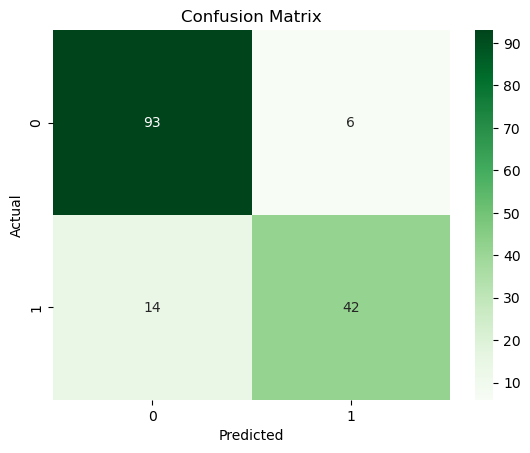

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        99
           1       0.88      0.75      0.81        56

    accuracy                           0.87       155
   macro avg       0.87      0.84      0.86       155
weighted avg       0.87      0.87      0.87       155



In [6]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predictions))


The model seems to do a good job in classifying whether fast food items have high calories/high sugar or not.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


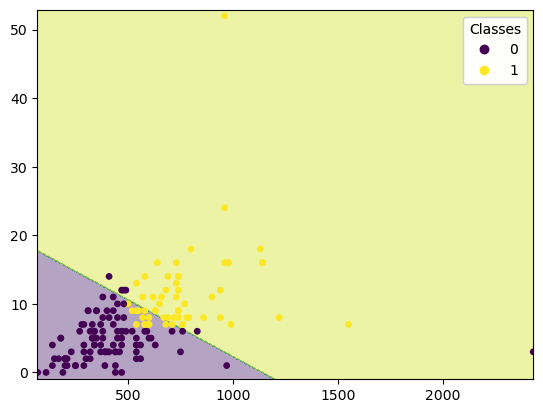

In [11]:
import numpy as np

# Defining the function for the decision boundary
def plot_decision_boundary(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=15)

    legend1 = ax.legend(*scatter.legend_elements(),
                        title="Classes")
    ax.add_artist(legend1)
    plt.show()

# Create a new figure and plot the decision boundary
fig, ax = plt.subplots()
plot_decision_boundary(X_test.values, y_test.values, model, ax)
